In [1]:
__author__ = 'Aleksandar Skrbic'

import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt

PATH = '../../images/barcode.jpg'

In [2]:
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = 16, 10

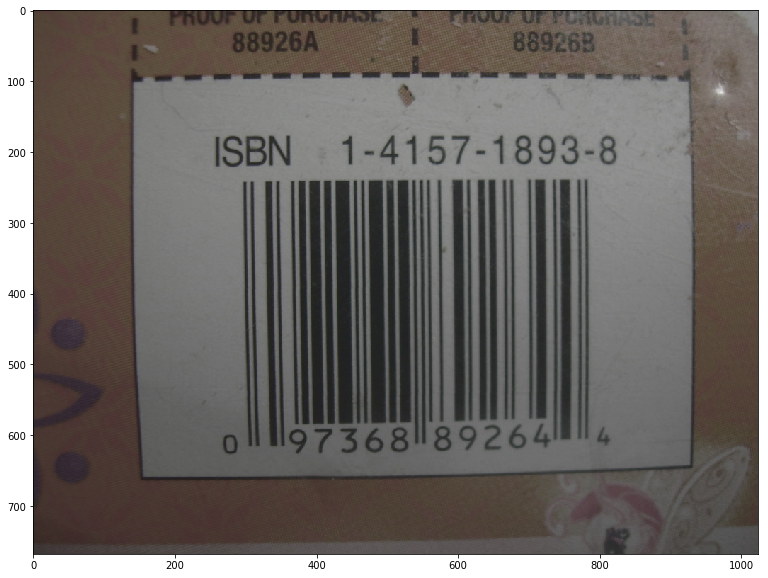

In [3]:
img_barcode = cv2.cvtColor(cv2.imread(PATH), cv2.COLOR_BGR2RGB)
plt.imshow(img_barcode)

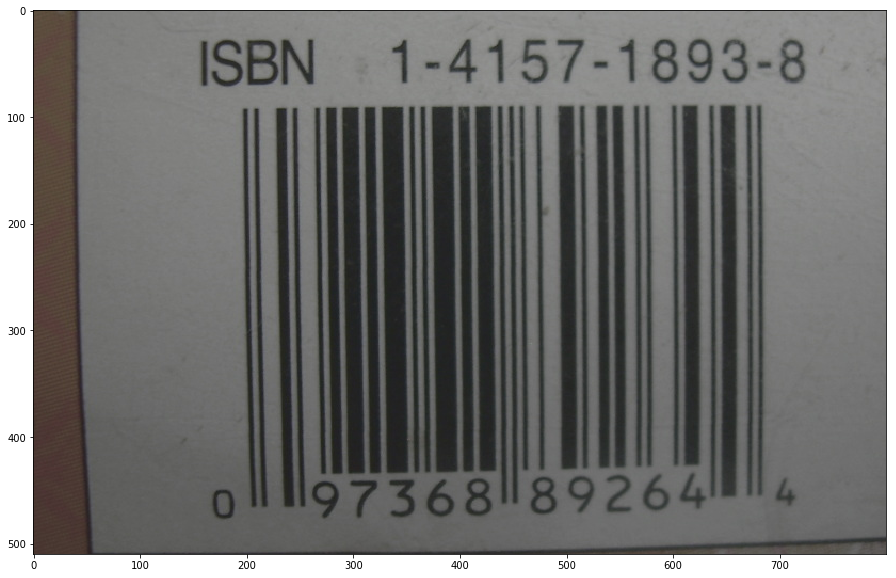

In [4]:
img_barcode = img_barcode[150:660, 100:900]
plt.imshow(img_barcode)

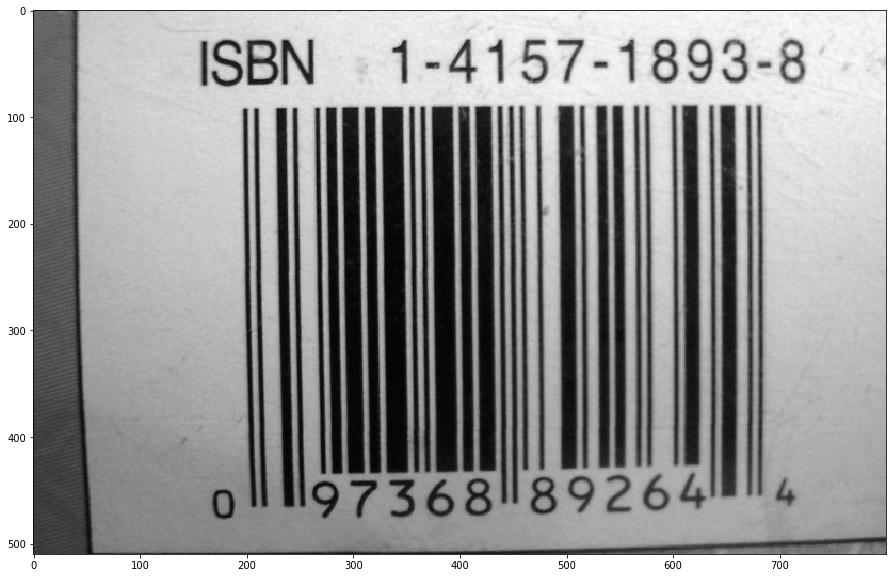

In [5]:
img_barcode_gs = cv2.cvtColor(img_barcode, cv2.COLOR_RGB2GRAY)
plt.imshow(img_barcode_gs, 'gray')

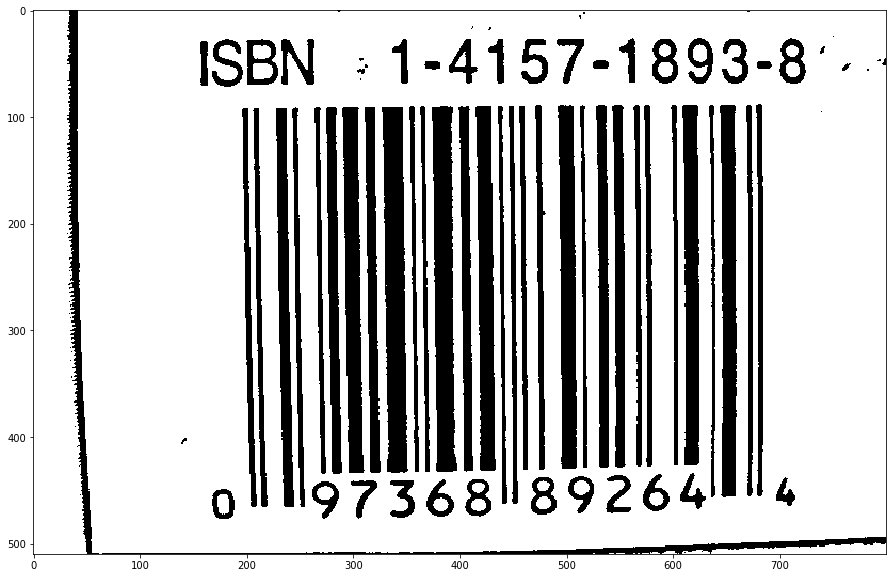

In [6]:
image_barcode_bin = cv2.adaptiveThreshold(img_barcode_gs, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 35, 10)
plt.imshow(image_barcode_bin, 'gray')

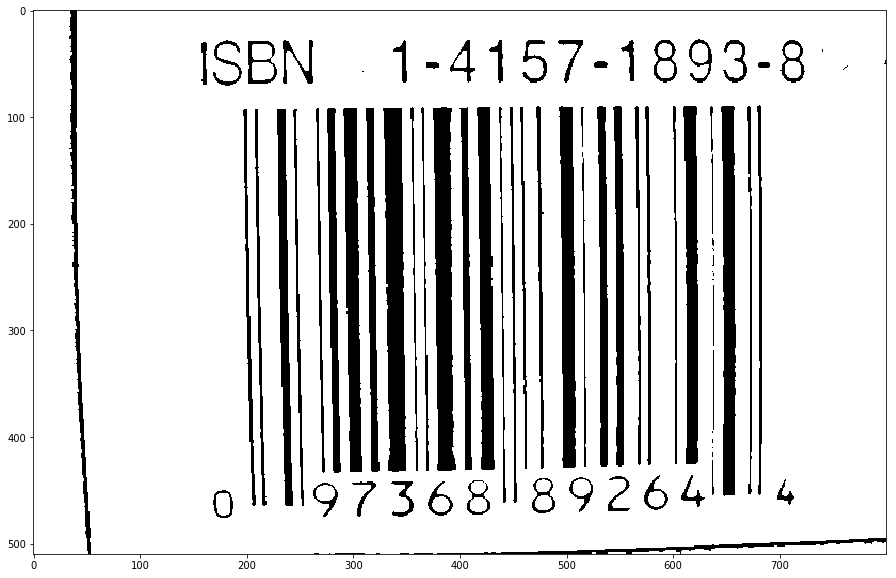

In [7]:
image_barcode_bin = cv2.dilate(image_barcode_bin, None, iterations=1)
plt.imshow(image_barcode_bin, 'gray')

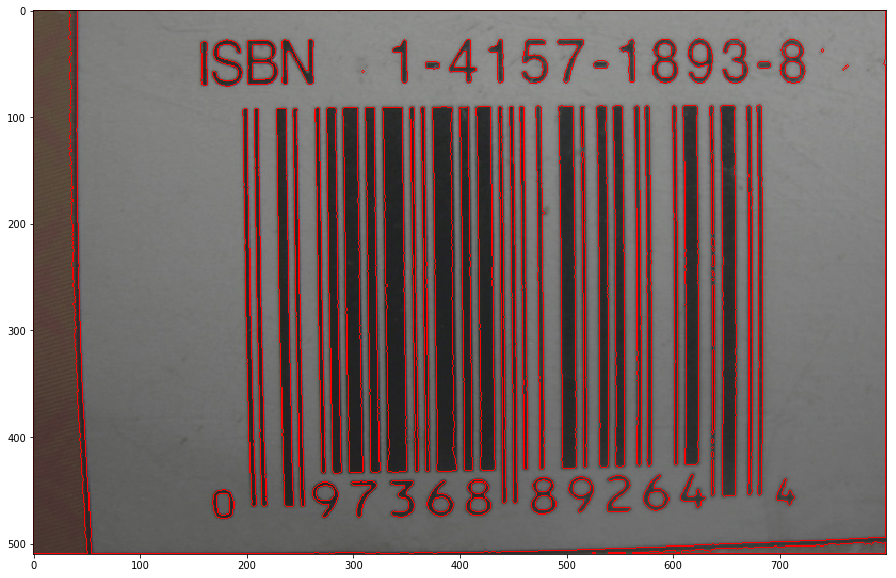

In [8]:
img, contours, hierarchy = cv2.findContours(image_barcode_bin, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img = img_barcode.copy()
cv2.drawContours(img, contours, -1, (255, 0, 0), 1)
plt.imshow(img)

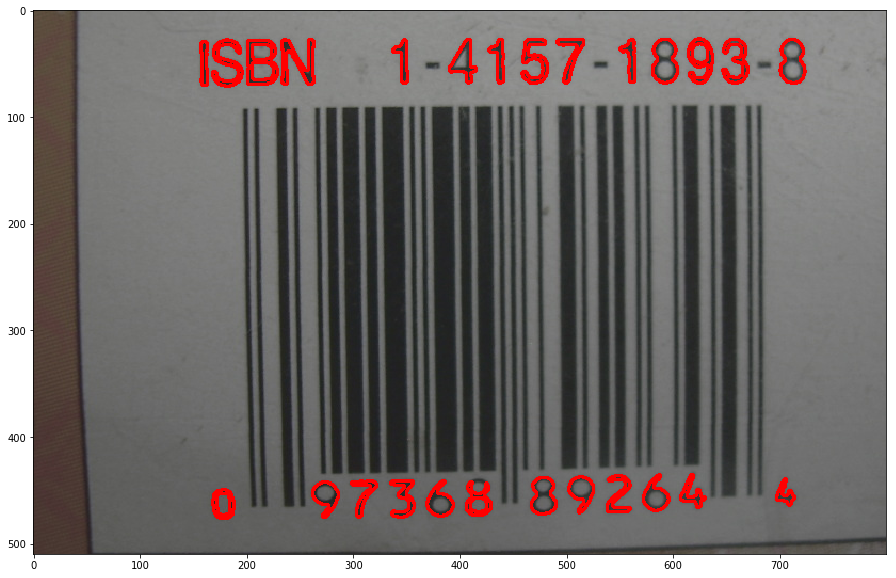

In [9]:
letters_and_numbers = []
for contour in contours:
    center, size, angle = cv2.minAreaRect(contour)
    width, height = size
    if width > 4 and width < 39 and height > 15 and height < 52:
        letters_and_numbers.append(contour)

img = img_barcode.copy()
cv2.drawContours(img, letters_and_numbers, -1, (255, 0, 0), 2)
plt.imshow(img)